start: 2020/05/07 05:48:00
score[000]: -0.0008150371643589338
score[001]: -0.029920756034551577
score[002]: -0.01628149622626851
score[003]: -0.01244268562602624
score[004]: -0.0006337478779150363
score[005]: -0.008683718485767766
score[006]: -0.001525747357649543
score[007]: -0.0013367432679260993
score[008]: -0.0033465248903998823
score[009]: -0.031061475023401956
score[010]: 0.0009187880322850672
score[011]: -0.01067495433832466
score[012]: -0.00771267792385344
score[013]: 0.0003058764288949023
score[014]: -0.0018211521151838552
score[015]: -0.021410020525343798
score[016]: -0.005469703510960544
score[017]: -0.006959615582241785
score[018]: -0.0005170530452309752
score[019]: -0.04742865868259294
score[020]: -0.00908282500497748
score[021]: -0.00044655884873590074
score[022]: -0.00729659999159904
score[023]: -0.028538932430936637
score[024]: -0.016982490109874737
score[025]: -0.015216481933229886
score[026]: 0.0015428680011607687
score[027]: 0.0009929492291035347
score[028]: -0.00558

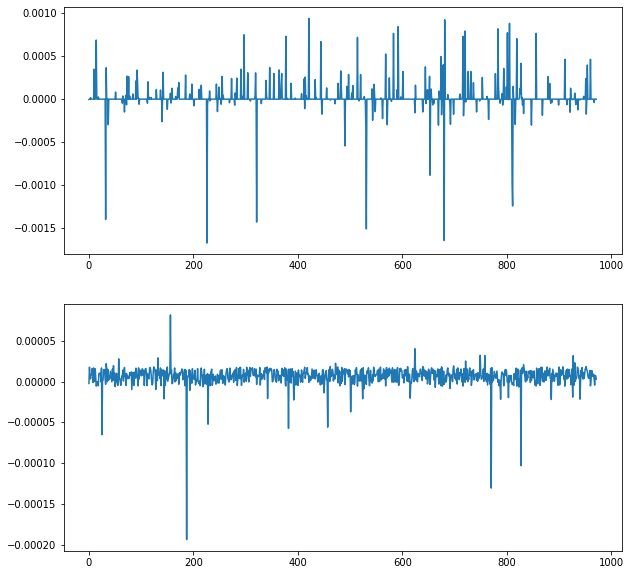

end: 2020/05/07 05:48:01


In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import bitcoin
%matplotlib inline

def plot(b):
    x = b.data_test[-3500:]
    y_result = list(b.label_test)[-3500:]
    y_predict = list(b.model.predict(x))

    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_result)
    ax2.plot(list(range(len(x))), y_predict)
    plt.show()

def main():
    print("start: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))


    file_name = "train_test"
    csv = pd.read_csv("datasets/" + file_name + ".csv")
    b = bitcoin.BitcoinRegression()
    b.set_dataset(csv)
    print(f"score[avg]: {b.calc_avg_score()}")
    plot(b)

    test_start = int(len(csv) * 0.8)  # 最後20%のデータでテスト
    b.data_train = csv[bitcoin.TRAIN_COLUMNS][:test_start]
    b.label_train = csv["result"][:test_start]
    b.train()
    with open("models/" + file_name + ".pickle", mode="wb") as file:
        pickle.dump(b.model, file)
    

    print("end: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()